<a href="https://colab.research.google.com/github/sujithrc/NER_using_Spcacy/blob/main/NER_using_Spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;New&#41; Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  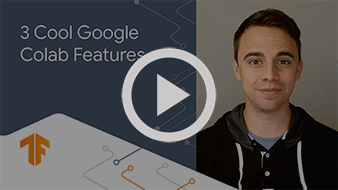
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

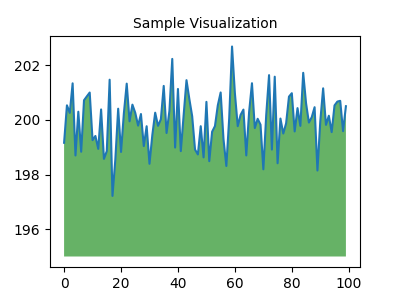

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning crash course

<div>

These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame with a specified encoding
df = pd.read_csv('/content/drive/MyDrive/NER dataset.csv', encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
df.head()


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [ ]:
# Check the shape of the DataFrame
shape = df.shape

# Display the number of rows and columns
print(f"Number of rows: {shape[0]}, Number of columns: {shape[1]}")


Number of rows: 1048575, Number of columns: 4


In [ ]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the count of null values
print(null_counts)


Sentence #    1000616
Word               10
POS                 0
Tag                 0
dtype: int64


In [ ]:
# Display the first 10 rows of the 'Sentence #' column
print(df['Sentence #'].tail(10))


1048565                NaN
1048566                NaN
1048567    Sentence: 47959
1048568                NaN
1048569                NaN
1048570                NaN
1048571                NaN
1048572                NaN
1048573                NaN
1048574                NaN
Name: Sentence #, dtype: object


In [ ]:
df['Word'] = df['Word'].fillna('')

In [ ]:
# Remove rows with null values in any column
df_cleaned = df.dropna()

# Display the shape of the cleaned DataFrame
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# Display the first few rows of the cleaned DataFrame
print(df_cleaned.head())



Cleaned DataFrame shape: (47949, 4)
     Sentence #       Word  POS Tag
0   Sentence: 1  Thousands  NNS   O
24  Sentence: 2   Families  NNS   O
54  Sentence: 3       They  PRP   O
68  Sentence: 4     Police  NNS   O
83  Sentence: 5        The   DT   O


In [ ]:


# Step to ensure all values in 'Word' are strings
df['Word'] = df['Word'].astype(str)

# Now you can proceed to group by 'Sentence #' and join the words to form sentences
sentences = df.groupby('Sentence #')['Word'].apply(lambda x: ' '.join(x)).reset_index()

# Display the first few sentences
print(sentences.head())



        Sentence #        Word
0      Sentence: 1   Thousands
1     Sentence: 10     Iranian
2    Sentence: 100  Helicopter
3   Sentence: 1000        They
4  Sentence: 10000        U.N.


In [ ]:
!pip install -U spacy


In [ ]:
# Download the Transformer model for SpaCy
!python -m spacy download en_core_web_trf




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 11.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import en_core_web_trf


In [ ]:
# Step 1: Uninstall SpaCy if it's already installed
!pip uninstall -y spacy

# Step 2: Reinstall SpaCy and transformers
!pip install -U spacy
!pip install -U spacy[transformers]

# Step 3: Download the transformer model
!python -m spacy download en_core_web_trf

# Step 4: Import and load the model
import spacy
nlp = spacy.load('en_core_web_trf')


Found existing installation: spacy 3.7.6
Uninstalling spacy-3.7.6:
  Successfully uninstalled spacy-3.7.6
  Using cached spacy-3.7.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
Using cached spacy-3.7.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.0 MB)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 80.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
 

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you

In [ ]:

text = "Thousands of demonstrators have marched against the government."

# Process the text
doc = nlp(text)

# Extract and print named entities
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

Entity: Thousands, Label: CARDINAL


/usr/local/lib/python3.10/dist-packages/thinc/shims/pytorch.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self._mixed_precision):


In [ ]:
df_cleaned.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
24,Sentence: 2,Families,NNS,O
54,Sentence: 3,They,PRP,O
68,Sentence: 4,Police,NNS,O
83,Sentence: 5,The,DT,O


In [ ]:
shape = df_cleaned.shape
shape

(47949, 4)

In [ ]:
df_cleaned['Sentence #'].info()

<class 'pandas.core.series.Series'>
Index: 47949 entries, 0 to 1048567
Series name: Sentence #
Non-Null Count  Dtype 
--------------  ----- 
47949 non-null  object
dtypes: object(1)
memory usage: 749.2+ KB


In [ ]:
# Group by 'Sentence #' and join the 'Word' entries to form complete sentences
sentences = df_cleaned.groupby('Sentence #')['Word'].apply(lambda x: ' '.join(x)).reset_index()

# Extract only the sentences into a list or a new DataFrame column
sentence_list = sentences['Word'].tolist()

# Display the sentences
for sentence in sentence_list:
    print(sentence)


Streaming output truncated to the last 5000 lines.
The
It
The
The
However
The
But
Rescuers
A
The
President
The
The
Earlier
It
Typhoon
Officials
More
In
A
And
European
The
It
The
Pakistani
The
Mr.
The
France
Nicolas
He
France
Mr.
The
Mr.
A
The
On
The
The
The
The
Producer
A
A
A
U.S.
It
The
Human
At
Some
According
The
Al-Faisal
The
The
Posada
Scientists
The
Scientists
An
The
A
The
The
Iran
Iran
Some
Both
Venezuelan
Syrian
The
The
Earlier
Previously
The
But
In
He
For
Now
VOA
The
But
The
VOA
Venezuelan
The
Their
In
Venezuela
Mr.
But
The
Havana
Police
Seoul
They
Police
Police
Pakistani
Under
The
An
Indonesia
The
He
Police
A
The
It
Khan
He
Agency
The
The
After
Here
Crude
Coffee
Cocoa
Copper
Israeli
In
A
The
He
Ukrainian
Happy
Mr.
He
Most
Some
Mr.
He
Turkey
A
The
That
Hundreds
A
The
Those
But
Officials
Some
Argentina
People
Cyclone
Meteorologists
Authorities
There
Farmers
Completing
The
The
General
China
Wen
He
But
The
The
Spokeswoman
It
She
It
U.S.
Violence
Some
It
A
Friday
But
The
Tropical
T

In [ ]:
!pip install colorama


In [ ]:
from colorama import Fore, Style

# Assuming df_cleaned is your DataFrame
# Combine all words into a single string
text = ' '.join(df_cleaned['Word'].astype(str).tolist())

# Load the SpaCy model (ensure it's already downloaded)
nlp = spacy.load('en_core_web_trf')  # Change to 'en_core_web_trf' if you prefer

# Process the combined text
doc = nlp(text)

# Step to extract and print POS and NER
# Extract and print POS for each token in the processed document
print("Part-of-Speech Tags:")
for token in doc:
    print(f"Word: {token.text}, POS: {token.pos_}")

# Extract and print Named Entities with color
print("\nNamed Entities:")
for ent in doc.ents:
  import pandas as pd
import spacy
from colorama import Fore, Style

# Assuming df_cleaned is your DataFrame
# Combine all words into a single string
text = ' '.join(df_cleaned['Word'].astype(str).tolist())

# Load the SpaCy model (ensure it's already downloaded)
nlp = spacy.load('en_core_web_sm')  # Change to 'en_core_web_trf' if you prefer

# Process the combined text
doc = nlp(text)

# Step to extract and print POS and NER
# Extract and print POS for each token in the processed document
print("Part-of-Speech Tags:")
for token in doc:
    print(f"Word: {token.text}, POS: {token.pos_}")

# Extract and print Named Entities with color
print("\nNamed Entities:")
for ent in doc.ents:
    print(f"{Fore.BLUE}Entity: {Fore.GREEN}{ent.text}, {Fore.BLUE}Label: {Fore.GREEN}{ent.label_}{Style.RESET_ALL}")

/usr/local/lib/python3.10/dist-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(filelike, map_location=dev

Streaming output truncated to the last 5000 lines.
Entity: U.N., Label: ORG
Entity: Eight, Label: CARDINAL
Entity: The The The The Monday, Label: WORK_OF_ART
Entity: Americans, Label: NORP
Entity: Pakistan, Label: GPE
Entity: Pakistan, Label: GPE
Entity: The International Reacting The The The English, Label: ORG
Entity: Pakistani, Label: NORP
Entity: The U.S. Ukrainian Opposition, Label: ORG
Entity: Stephen An, Label: PERSON
Entity: If THE When, Label: WORK_OF_ART
Entity: " The A The One One, Label: WORK_OF_ART
Entity: Ecuador, Label: GPE
Entity: US, Label: GPE
Entity: The, Label: PERSON
Entity: China, Label: GPE
Entity: China, Label: GPE
Entity: Iranian, Label: NORP
Entity: The, Label: PERSON
Entity: EU, Label: ORG
Entity: U.S., Label: GPE
Entity: Mitchell U.S., Label: PERSON
Entity: Wednesday, Label: DATE
Entity: Venezuelan, Label: NORP
Entity: The Tens Dissident, Label: ORG
Entity: Kinshasa, Label: GPE
Entity: Rwanda, Label: GPE
Entity: Saturday, Label: DATE
Entity: U.S., Label: GPE